# Sentiment Classification of Product Reviews

## Import the data

In [2]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
# Get compiled data
!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

--2025-01-23 19:32:42--  https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22322605 (21M) [text/plain]
Saving to: ‘Compiled_Reviews.txt’

Compiled_Reviews.tx 100%[===================>]  21.29M  --.-KB/s    in 0.1s    

2025-01-23 19:32:43 (167 MB/s) - ‘Compiled_Reviews.txt’ saved [22322605/22322605]



In [4]:
# Create separate lists for reviews and labels
reviews=[]
sentiment_ratings=[]
product_types=[]
helpfulness_ratings=[]

with open("Compiled_Reviews.txt") as f:
   for line in f.readlines()[1:]:
        fields = line.rstrip().split('\t')
        reviews.append(fields[0])
        sentiment_ratings.append(fields[1])
        product_types.append(fields[2])
        helpfulness_ratings.append(fields[3])

In [5]:
# Check the length of the reviews list
len(reviews)

36548

## Exploratory Analysis

In [ ]:
## Explore sentiment ratings

In [ ]:
# Count sentiment with Counter()
sentiment_ratings_counter = Counter(sentiment_ratings)
sentiment_ratings_counter

Counter({'positive': 20972, 'negative': 15576})

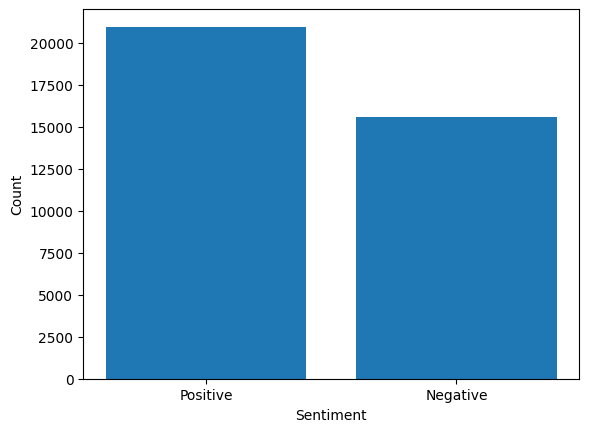

In [ ]:
plt.hist(sentiment_ratings, bins=2, align='left', rwidth=0.8)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 0.5], ['Positive', 'Negative'])
plt.show()

In [ ]:
# NOT needed?
# Categorise sentiments
categorised_sentiment = []
for sentiment in sentiment_ratings:
  if sentiment == 'positive':
    categorised_sentiment.append('Positive')
  else:
    categorised_sentiment.append('Negative')

print(len(categorised_sentiment))

# Count positive vs negative sentiments
positive_count = categorised_sentiment.count("Positive")
print(f"Positive count: {positive_count}")
negative_count = categorised_sentiment.count("Negative")
print(f"Negative count: {negative_count}")

36548
Positive count: 20972
Negative count: 15576


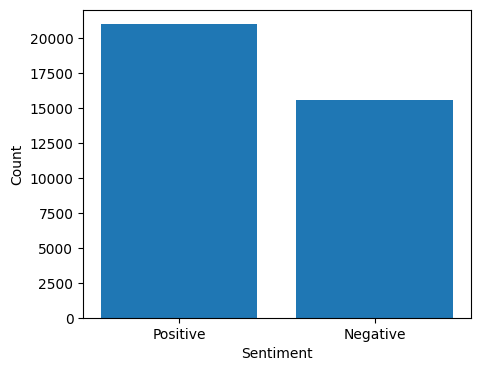

In [ ]:
# Plot positive vs negative sentiment using matplotlib
plt.figure(figsize=(5, 4))
plt.hist(categorised_sentiment, bins=2, align='left', rwidth=0.8)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 0.5], ['Positive', 'Negative'])
plt.show()

In [ ]:
## Explore product types
# Get count per profuct type - returns a dict
product_type_count = Counter(product_types)
#product_type_count

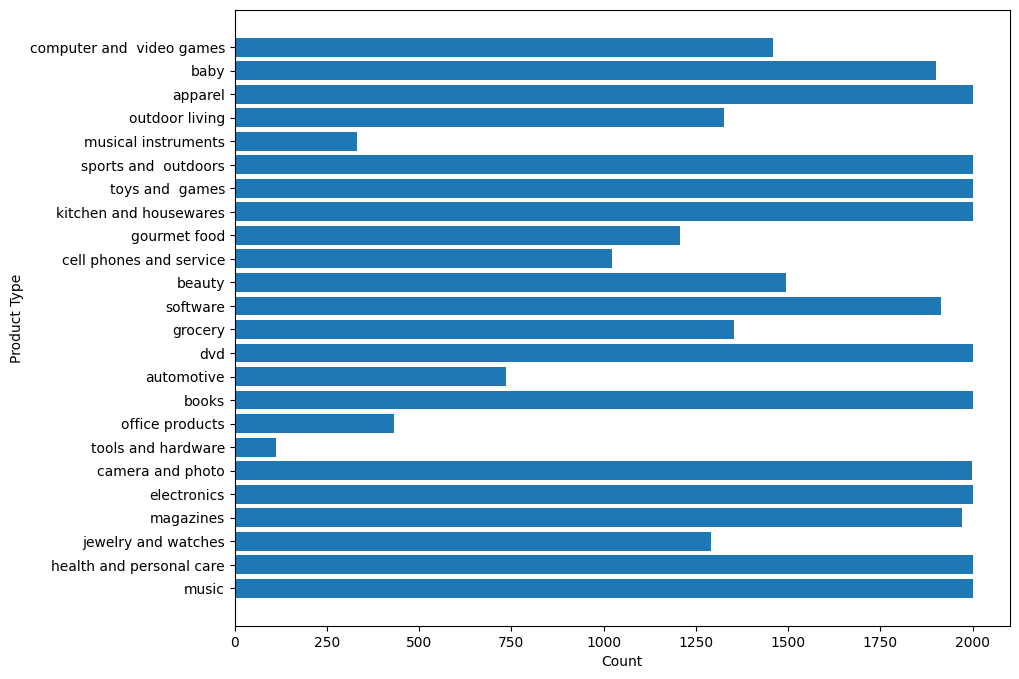

In [ ]:
# Plot product types with counts
plt.figure(figsize=(10, 8))
product_type_count = Counter(product_types)
plt.barh(list(product_type_count.keys()), list(product_type_count.values()))
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

In [ ]:
## Explore review helpfulness
helpfulness_ratings_count = Counter(helpfulness_ratings)
helpfulness_ratings_count

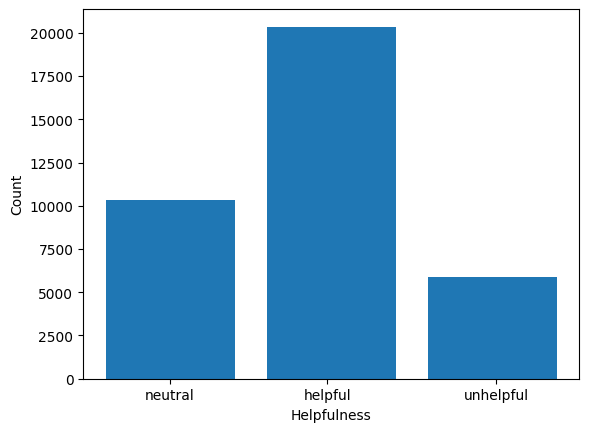

In [ ]:
plt.hist(helpfulness_ratings, bins=3, align='left', rwidth=0.8)
plt.xlabel('Helpfulness')
plt.ylabel('Count')
plt.xticks([0, 0.65, 1.35], ['neutral', 'helpful', 'unhelpful'])
plt.show()

## Classification

### Preprocessing

Tokenisation of the reviews

In [6]:
# Define the character to split on for tokenisation
token_definition = re.compile("[^ ]+")

In [5]:
# Remove stopwords
# define the stopword list
#stopwords = ["\'", "\", ", "-"," --", ".", "?", "!", "THE", "the", "in", "on", "too", "after", "to", "is","what", "how", "when, isn't", "then","two", "2", "until", "which", "didn't", "it'll"]

In [7]:
# Tokenise the reviews
# each review is a list of strings (words) - separate list for each review
tokenised_reviews = [token_definition.findall(txt) for txt in reviews]

In [8]:
# Put all tokens into one list
tokens=[]
for token in tokenised_reviews:
  # omit stopwords in the final review tokens
  #if token not in stopwords:
    tokens.extend(token)
  #else:
   # continue

In [9]:
# Count the tokens - returns a list of tuples with tokens and their counts
token_counts=Counter(tokens)
#token_counts

In [10]:
# sort tuples to put most frequent first
sorted_token_counts=sorted(token_counts.items(), key=lambda item: item[1], reverse=True)
# select just tokens
sorted_tokens=list(zip(*sorted_token_counts))[0]
#sorted_tokens

In [11]:
# Select the first 5000 words which will be used as vocabulary for one-hot encoding
tokens_5000 = sorted_tokens[0:5000]
len(tokens_5000)

5000

### Encode reviews with one-hot encoding

In [12]:
# Create a matrix for one-hot encoding
# size 36547 x 5000 matrix of zeros; row represents a review and column each token
one_hot_matrix = np.zeros((len(reviews), len(tokens_5000)))

# Loop through reviews
for i, rev in enumerate(reviews):
    # Tokenise the current review
    tokens = token_definition.findall(rev)
    # iterate over the set of 5000 words
    for j,t in enumerate(tokens_5000):
        # if the current word j occurs in the current review i then set the matrix element at i,j to 1
        if t in tokens:
             one_hot_matrix[i,j] = 1

In [13]:
# inspect the shape of the one_hot_matrix
one_hot_matrix.shape

(36548, 5000)

In [14]:
# check first row of the matrix
one_hot_matrix[:3]

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

### Split the data

In [15]:
# Select reviews for training - randomly select 80% of the indices from the reviews list for training
train_set = np.random.choice(len(reviews), int(len(reviews) * 0.8),replace=False)

# Select reviews for testing - subtract the training set indices from the full set of indices (remaining 20%)
remaining_indices = list(set(range(0,len(reviews))) - set(train_set))

# Select half of the remaining indices for the test set
test_set = np.random.choice(remaining_indices,int(len(remaining_indices) * 0.5),replace=False)

# Select the remaining indices after selecting the test set for the dev set
dev_set= list(set(remaining_indices) - set(test_set))

In [16]:
# Create separate matrices for training, test and dev to be used as input features to the model

# Select the rows from the one_hot_matrix corresponding to the training set indices (columns 5000, one column for each token)
train_matrix = one_hot_matrix[train_set, :] # select these rows (selected reviews) and select all columns (all 5000 words)
# Select the rows for the test indices
test_matrix = one_hot_matrix[test_set, :]

# Select the rows for the dev indices
dev_matrix = one_hot_matrix[dev_set, :]

In [17]:
# Create training, test, and dev labels - select the labels corresponding to the training/test/dev set indices
sentiment_labels_train = [sentiment_ratings[i] for i in train_set] # iterate over indices in train_set and select corresponding labels
sentiment_labels_test = [sentiment_ratings[i] for i in test_set]
sentiment_labels_dev = [sentiment_ratings[i] for i in dev_set]

In [18]:
# Prepare gold labels  'y'
# Convert sentiment labels to binary (0 or 1)
# uses list comprehension that iterates over each label; if l is positive then it convert it to 1 with int()
# and convert the whole list into a numpy array;
y_train = np.array([int(label == "positive") for label in sentiment_labels_train])
y_test = np.array([int(label == "positive") for label in sentiment_labels_test])
y_dev = np.array([int(label == "positive") for label in sentiment_labels_dev])

### Fit a logistic regression model

In [19]:
## Fit the model

# Define the number of input features used in the one-hot encoding
num_features=5000
# Generate random weights for each feature - array of random numbers 0-1
weights = np.random.rand(num_features)
# initialize bias randomly
bias=np.random.rand(1)
# Set number of iterations for training
n_iters = 4000
# set learning rate for optimization
lr=0.2
# Create a list to store loss values from each iteration
logistic_loss=[]
# set the number of training samples using y (array of sentiment labels)
num_samples=len(y_train)

In [20]:
# Divide the training data into batches
k = 10
# Create array of all indices in training data
a = np.arange(y_train.shape[0])
# randomly shuffle indices
np.random.shuffle(a)
# Split indices into k equal batches
batches = np.array_split(a, k)

In [22]:
## Train the model

# During every iteration:
for i in range(n_iters):
  for batch in batches:
    # select batch data
    batch_train_matrix = train_matrix[batch]
    batch_y_train = y_train[batch]

    # Forward pass: calculate z score
    z = batch_train_matrix.dot(weights) + bias

    # convert to probabilities with sigmoid function - outputs 0 or 1
    # q is predicted classes
    q = 1 / (1 + np.exp(-z))

    # Calculate Loss
    eps = 0.00001  # add a small value to predicted class value to avoid taking a log 0
    # cross-entropy loss
    loss = -np.sum((batch_y_train * np.log2(q + eps) + (np.ones(len(batch_y_train)) - batch_y_train) * np.log2(np.ones(len(batch_y_train)) - q + eps)))

    # Backwards pass
    # Calculate the gradient of the loss with respect to weights
    dw = (q - batch_y_train).dot(batch_train_matrix) * (1 / len(batch_y_train))
    # gradient with respect to bias
    db = sum((q - batch_y_train)) / len(batch_y_train)

    # update parameters
    weights = weights - lr*dw
    bias = bias - lr*db

 # append the loss value from the current iteration
  logistic_loss.append(loss)

In [24]:
## Plot the loss values against the number of iterations/epochs
#plt.plot(range(1,n_iters),logistic_loss[1:])
#plt.xlabel("number of epochs")
#plt.ylabel("loss")

### Test with the development set

In [25]:
## DEV set testing
z = dev_matrix.dot(weights)+bias
q = 1/(1+np.exp(-z))
y_dev_pred = []

# iterate over probability score q and add labels 1 and 0 to the labels list
for i in q:
  if i > 0.5:
    y_dev_pred.append(1)
  else:
    y_dev_pred.append(0)


print(y_dev_pred)

[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 

In [26]:
# Calculate accuracy
# convert sentiment labels to 0/1
y_dev=[int(l == "positive") for l in sentiment_labels_dev] # int returns 1 or 0

# compares same index in both lists (gold y_test vs predicted labels)
acc_dev=[int(yp == y_dev[s]) for s,yp in enumerate(y_dev_pred)]
accuracy = sum(acc_dev)/len(acc_dev)
print(accuracy)

0.8355677154582763


In [27]:
# Calculate precision and recall
labels_dev_pred=["positive" if s == 1 else "negative" for s in y_dev_pred]
true_positives= sum([int(yp == "positive" and sentiment_labels_dev[s] == "positive") for s,yp in enumerate(labels_dev_pred)])
false_positives = sum([int(yp=="positive" and sentiment_labels_dev[s] == "negative") for s,yp in enumerate(labels_dev_pred)])
false_negatives = sum([int(yp=="negative" and sentiment_labels_dev[s] == "positive") for s,yp in enumerate(labels_dev_pred)])

In [39]:
prec_dev = true_positives/(true_positives + false_positives)
print(prec_dev)

0.8503336510962822


In [40]:
recall_dev = true_positives/(true_positives + false_negatives)
print(recall_dev)

0.8614196040560116


In [41]:
# Calculate f-score
f_score_dev = (2* prec_dev * recall_dev) / (prec_dev + recall_dev)
print(f_score_dev)

0.8558407291916528


In [42]:
# Print a summary of model performance including main set parameters
print(f"Summary of model performance with key parameters\nNumber of iterations: {n_iters}\nLearning rate: {lr}\nAccuracy: {accuracy}\nPrecision: {prec_dev}\nRecall: {recall_dev}\nF-score: {f_score_dev}")

Summary of model performance with key parameters
Number of iterations: 4000
Learning rate: 0.2
Accuracy: 0.8355677154582763
Precision: 0.8503336510962822
Recall: 0.8614196040560116
F-score: 0.8558407291916528


Inspect weights

In [43]:
# Inspect words contributing most to negative sentiment
[tokens_5000[x] for x in np.argsort(weights)[0:10]]

['terrible.',
 'worst',
 'hopes',
 'disappointing.',
 'disappointment.',
 'horrible',
 'waste',
 'returning',
 'boring.',
 'uncomfortable']

In [44]:
# Inspect words contributing most to positive sentiment
[tokens_5000[x] for x in np.argsort(weights)[::-1][0:10]]

['Excellent',
 'amazing.',
 'great!',
 'refreshing',
 'too"',
 'Highly',
 'helpful.',
 'awesome.',
 'Great',
 'perfect.']

### Testing the model with the test set

In [45]:
## TEST set testing
# calculate predicted class for each test sample - gives z score
z = test_matrix.dot(weights)+bias
# turn z into probability with sigmoid
q = 1/(1+np.exp(-z))
#create an empty list for predicted labels
y_test_pred = []

# iterate over probability score q and add labels 1 and 0 to the labels list
for i in q:
  if i > 0.5:
    y_test_pred.append(1)
  else:
    y_test_pred.append(0)

# could be done with list comprehension as well
#y_test_pred = [int(i>0.5) for i in q]

print(y_test_pred)

[1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 

In [46]:
# Calculate accuracy
# convert sentiment labels to 0/1
y_test=[int(l == "positive") for l in sentiment_labels_test] # int returns 1 or 0

# compares same index in both lists (gold y_test vs predicted labels)
acc_test=[int(yp == y_test[s]) for s,yp in enumerate(y_test_pred)]
accuracy = sum(acc_test)/len(acc_test)
print(accuracy)

Accuracy:0.8385772913816689


In [47]:
# Calculate precision and recall
labels_test_pred=["positive" if s == 1 else "negative" for s in y_test_pred]
true_positives= sum([int(yp == "positive" and sentiment_labels_test[s] == "positive") for s,yp in enumerate(labels_test_pred)])
false_positives = sum([int(yp=="positive" and sentiment_labels_test[s] == "negative") for s,yp in enumerate(labels_test_pred)])
false_negatives = sum([int(yp=="negative" and sentiment_labels_test[s] == "positive") for s,yp in enumerate(labels_test_pred)])

In [48]:
prec_test = true_positives/(true_positives + false_positives)
print(prec_test)

0.8537398761314912


In [49]:
recall_test = true_positives/(true_positives + false_negatives)
print(recall_test)

0.8636144578313253


In [50]:
# Calculate f-score
f_score_test = (2* prec_test * recall_test) / (prec_test + recall_test)
print(f_score_test)

0.8586487781504553


In [51]:
# Print a summary of model performance including main set parameters
print(f"Summary of model performance with key parameters\nNumber of iterations: {n_iters}\nLearning rate: {lr}\nAccuracy: {accuracy}\nPrecision: {prec_test}\nRecall: {recall_test}\nF-score: {f_score_test}")

Summary of model performance with key parameters
Number of iterations: 4000
Learning rate: 0.2
Accuracy: 0.8385772913816689
Precision: 0.8537398761314912
Recall: 0.8636144578313253
F-score: 0.8586487781504553
